In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import statistics as stats
import seaborn as sb

In [145]:
df = pd.read_csv('combined_data_packt.csv')
df.head()

,book_name,book_ratings,book_number_of_reviews,book_price,book_discount,book_author,book_date
0,Python 3 Object-Oriented Programming: Build ro...,4.4,201,"4,770",0,by Dusty Phillips,30 October 2018
1,Learning RStudio for R Statistical Computing,3.7,13,"1,828",0,by Mark van der Loo and Edwin de Jonge,24 December 2012
2,Socket.io Real-time Web Application Development,3.2,4,"2,243",0,by Rohit Rai,22 February 2013
3,eZ Publish 4: Enterprise Web Sites Step-by-Step,1.0,1,220,0,by Francesco Trucchia and Francesco Fullone,20 October 2009
4,Robot Framework Test Automation,2.9,17,"1,828",0,by Sumit Bisht,25 October 2013


In [146]:
df.isna().sum()

book_name                 0
book_ratings              0
book_number_of_reviews    0
book_price                0
book_discount             0
book_author               0
book_date                 0
dtype: int64

In [147]:
df.shape

(1077, 7)

In [148]:
for i in range(len(df['book_price'])):
    if ',' in df['book_price'][i]:
        df['book_price'][i] = df['book_price'][i].split(',')[0] + df['book_price'][i].split(',')[1]
        df['book_price'][i] = float(df['book_price'][i])
    else:
        df['book_price'][i] = float(df['book_price'][i])
        
for i in range(len(df['book_number_of_reviews'])):
    if ',' in df['book_number_of_reviews'][i]:
        df['book_number_of_reviews'][i] = df['book_number_of_reviews'][i].split(',')[0] + df['book_number_of_reviews'][i].split(',')[1]
        df['book_number_of_reviews'][i] = float(df['book_number_of_reviews'][i])
    else:
        df['book_number_of_reviews'][i] = float(df['book_number_of_reviews'][i])

<ipython-input-148-5cf9904bd185>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_price'][i] = df['book_price'][i].split(',')[0] + df['book_price'][i].split(',')[1]
<ipython-input-148-5cf9904bd185>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_price'][i] = float(df['book_price'][i])
<ipython-input-148-5cf9904bd185>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book_price'][i] = float(df['book_price'][i])
<ip

# Relationships between price, ratings and number of reviews on books

In [236]:
print('Arithematic Mean of Book Ratings is -',np.mean(df['book_ratings']))
print('Median of Book Ratings is -',np.median(df['book_ratings']))

Arithematic Mean of Book Ratings is - 4.125162488393678
Median of Book Ratings is - 4.2


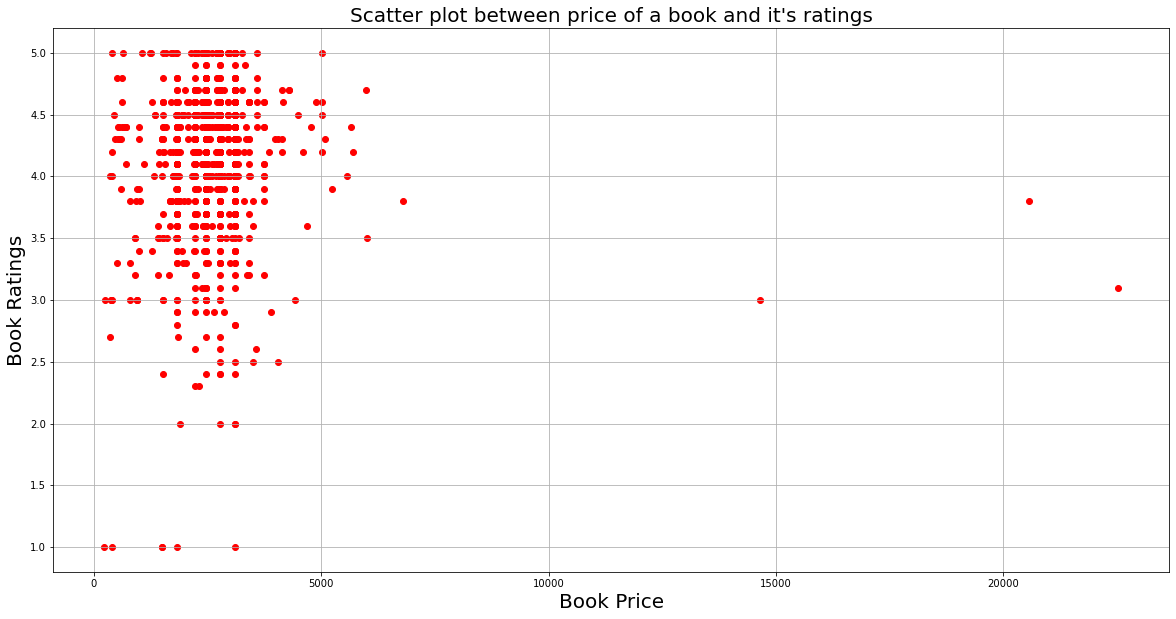

In [149]:
x_axis,y_axis = df['book_price'], df['book_ratings']

mpl.figure(figsize=(20, 10))
mpl.title("Scatter plot between price of a book and it's ratings", fontsize=20)
mpl.xlabel('Book Price', fontsize=20)
mpl.ylabel('Book Ratings', fontsize=20)
mpl.scatter(x_axis, y_axis, color='red')
mpl.grid()
mpl.show()

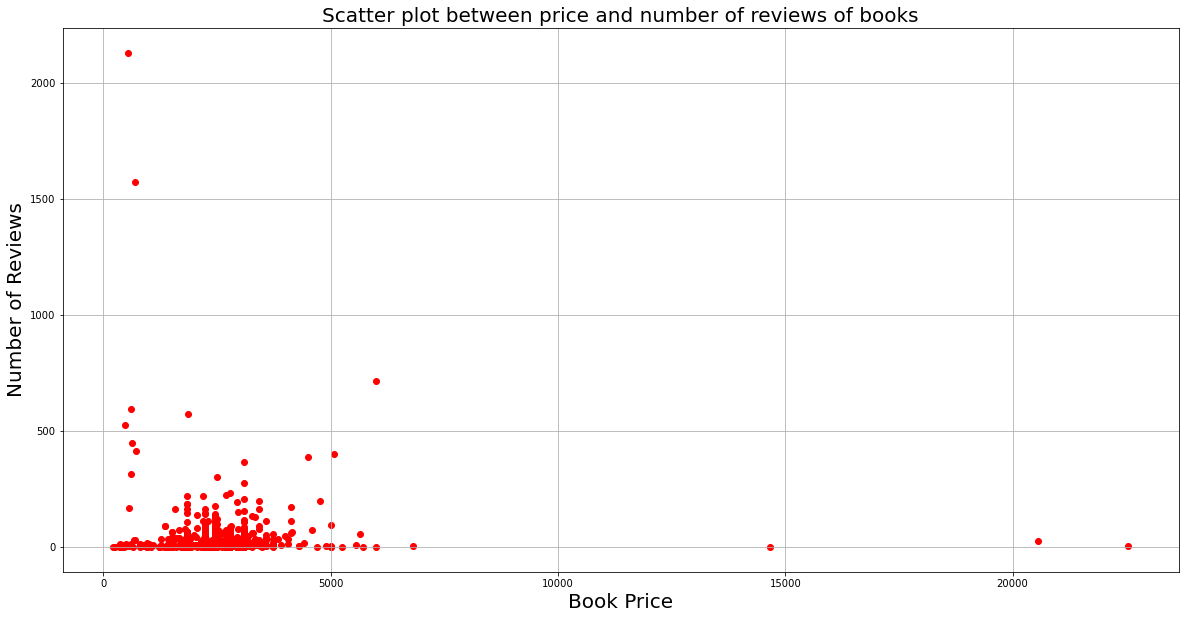

In [247]:
x_axis,y_axis = df['book_price'], df['book_number_of_reviews']

mpl.figure(figsize=(20, 10))
mpl.title("Scatter plot between price and number of reviews of books", fontsize=20)
mpl.xlabel('Book Price', fontsize=20)
mpl.ylabel('Number of Reviews', fontsize=20)
mpl.scatter(x_axis, y_axis, color='red')
mpl.grid()
mpl.show()

##### This scatter plot between the price and number of reviews of books shows that -
- Most of the people prefer reading the books that are not too expensive and since more people read the books in the price range of Rs. 2000-4000. they have the a consistent number of reviews.
- The books that are priced more than 5000 do not have many readers, thus not many reviews either.

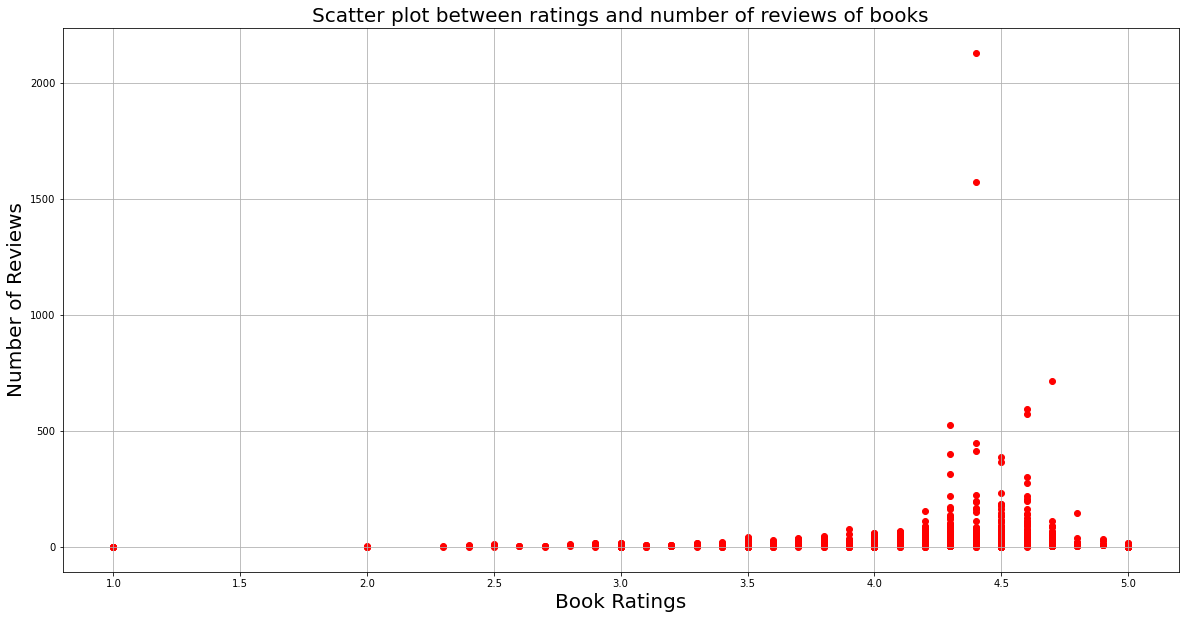

In [151]:
x_axis,y_axis = df['book_ratings'], df['book_number_of_reviews']

mpl.figure(figsize=(20, 10))
mpl.title("Scatter plot between ratings and number of reviews of books", fontsize=20)
mpl.xlabel('Book Ratings', fontsize=20)
mpl.ylabel('Number of Reviews', fontsize=20)
mpl.scatter(x_axis, y_axis, color='red')
mpl.grid()
mpl.show()

##### The scatter plot between ratings and number of reviews of a book goes onto tell you that - 
- When a book has higher ratings, it is actually been reviewed by a significant number of people, and liked by them.
- The books with less reviews has less ratings, which reflects that people do not review a book when they don't like it.

C:\Users\ranad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


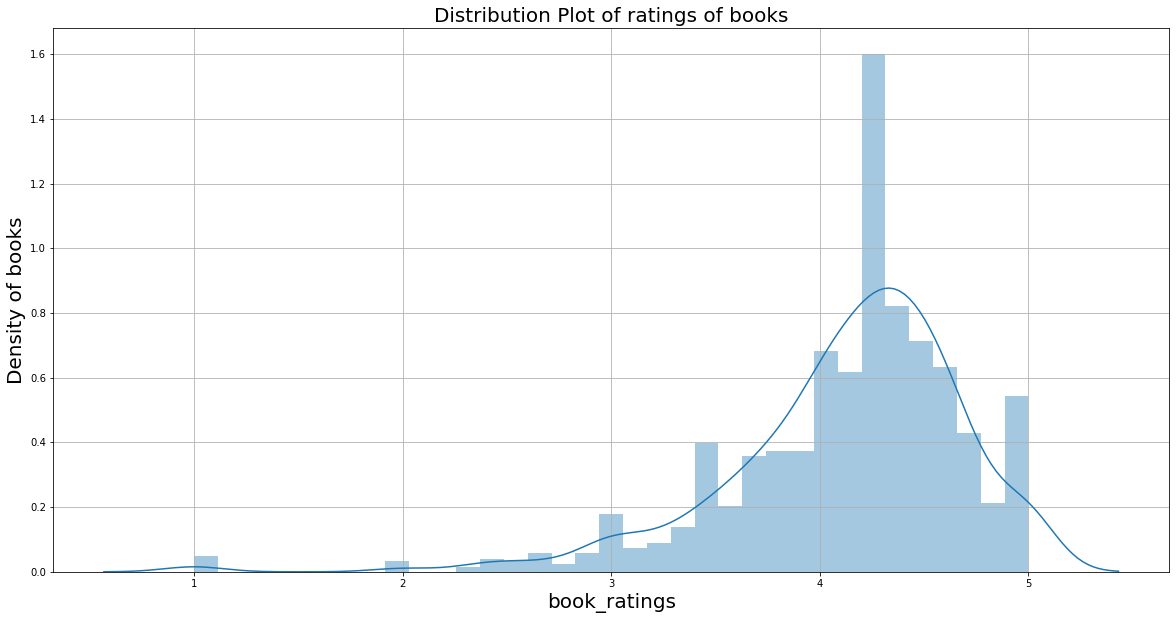

In [177]:
mpl.figure(figsize=(20, 10))
mpl.title("Distribution Plot of ratings of books", fontsize=20)
mpl.xlabel('Book Ratings', fontsize=20)
mpl.ylabel('Density of books', fontsize=20)
ax = sns.distplot(df['book_ratings'])
mpl.grid()
mpl.show()

##### The distribution plot of book ratings gives us an idea that 
- The book ratings are skewed significantly to the right.
- It reflects that most of the books have good ratings.

C:\Users\ranad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


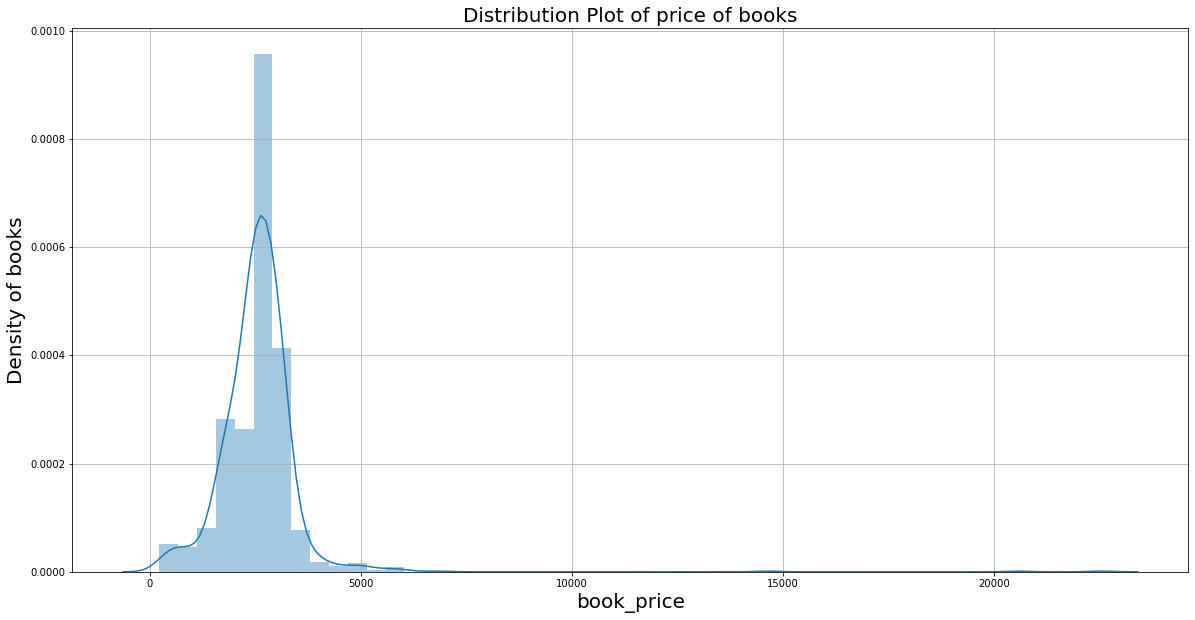

In [231]:
mpl.figure(figsize=(20, 10))
mpl.title("Distribution Plot of price of books", fontsize=20)
mpl.xlabel('Book Ratings', fontsize=20)
mpl.ylabel('Density of books', fontsize=20)
ax = sns.distplot(df['book_price'])
mpl.grid()
mpl.show()

- This distribution plot of book prices is clearly skewed to the left.
- It shows us that most of the books are priced in the range of 1000-4000.

In [235]:
print('Arithematic Mean of Book Price is -',np.mean(df['book_price']))
print('Median of Book Price is -',np.median(df['book_price']))

Arithematic Mean of Book Price is - 2572.314763231198
Median of Book Price is - 2466.0


In [253]:
a,b,c,d,e,f,g=0,0,0,0,0,0,0

for price in df['book_price']:
    if price in range(1,1001):
        a+=1
    elif price in range(1001,2001):
        b+=1
    elif price in range(2001,3001):
        c+=1
    elif price in range(3001,4001):
        d+=1
    elif price in range(4001,5001):
        e+=1
    elif price in range(5001,6001):
        f+=1
    elif price > 6000:
        g+=1
        

count={'0-1000':a,
      '1001-2000':b,
      '2001-3000':c,
      '3001-4000':d,
      '4001-5000':e,
      '5001-6000':f,
      '6001-7000':g,
      '7001+':h}

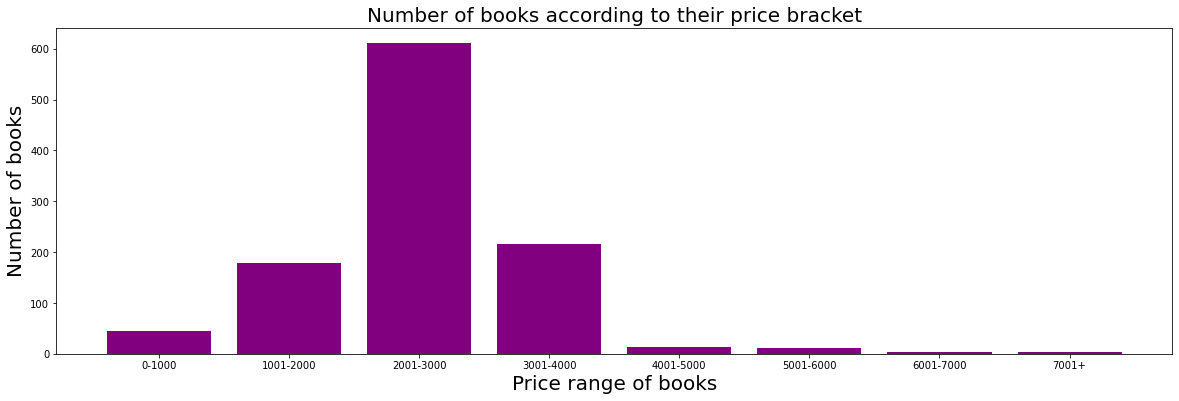

In [212]:
x_axis, y_axis=list(count.keys()), list(count.values())

mpl.figure(figsize=(20,6))
mpl.title('Number of books according to their price bracket', fontsize=20)
mpl.xlabel('Price range of books', fontsize=20)
mpl.ylabel('Number of books', fontsize=20)
mpl.bar(x_axis, y_axis, color='purple')
mpl.show()

- This bar plot shows that out of all the books available in the dataset, the most number of books have been priced in the range of Rs. 2000-3000 followed by the price bracket of Rs. 3000-4000 and then closely followed by Rs. 1000-2000 range.

# EDA of books with more than 10 reviews and ratings > 4.5

In [154]:
df_temp = df.loc[(df['book_ratings']>4.5) & (df['book_number_of_reviews']>10)]

In [155]:
df_temp

,book_name,book_ratings,book_number_of_reviews,book_price,book_discount,book_author,book_date
16,Cybersecurity Career Master Plan: Proven techn...,4.8,150.0,1828.0,0,"by Dr. Gerald Auger , Jaclyn “Jax” Scott , et ...",13 September 2021
22,Automated Testing in Microsoft Dynamics 365 Bu...,4.6,11.0,1510.0,0,by Luc van Vugt,30 April 2019
36,The Professional Scrum Master (PSM I) Guide: S...,4.6,36.0,1272.0,0,by Fred Heath,16 July 2021
58,Windows Server 2016 Administration Cookbook: C...,4.6,28.0,1828.0,0,by Jordan Krause,23 April 2018
62,Implementing and Administering Cisco Solutions...,4.7,47.0,1828.0,0,by Glen D. Singh,13 November 2020
...,...,...,...,...,...,...,...
973,"Windows Terminal Tips, Tricks, and Productivit...",4.6,13.0,1828.0,20,by Will Fuqua and Carlos Zamora,30 April 2021
987,The The Azure Cloud Native Architecture Mapboo...,4.6,33.0,3577.0,20,by Stephane Eyskens and Ed Price,17 February 2021
1033,Software Architecture Patterns for Serverless ...,4.8,16.0,609.0,44,by John Gilbert and Ed Price,30 July 2021
1037,"Mastering Active Directory: Design, deploy, an...",4.9,29.0,3102.0,20,by Dishan Francis,30 November 2021


In [237]:
print('The arithematic mean of price of books with ratings > 4.5 and more than 10 reviews is -',np.mean(df_temp['book_price']))
print('The median of price of books with ratings > 4.5 and more than 10 reviews is -',np.median(df['book_price']))

The arithematic mean of price of books with ratings > 4.5 and more than 10 reviews is - 2652.269565217391
The median of price of books with ratings > 4.5 and more than 10 reviews is - 2466.0


C:\Users\ranad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


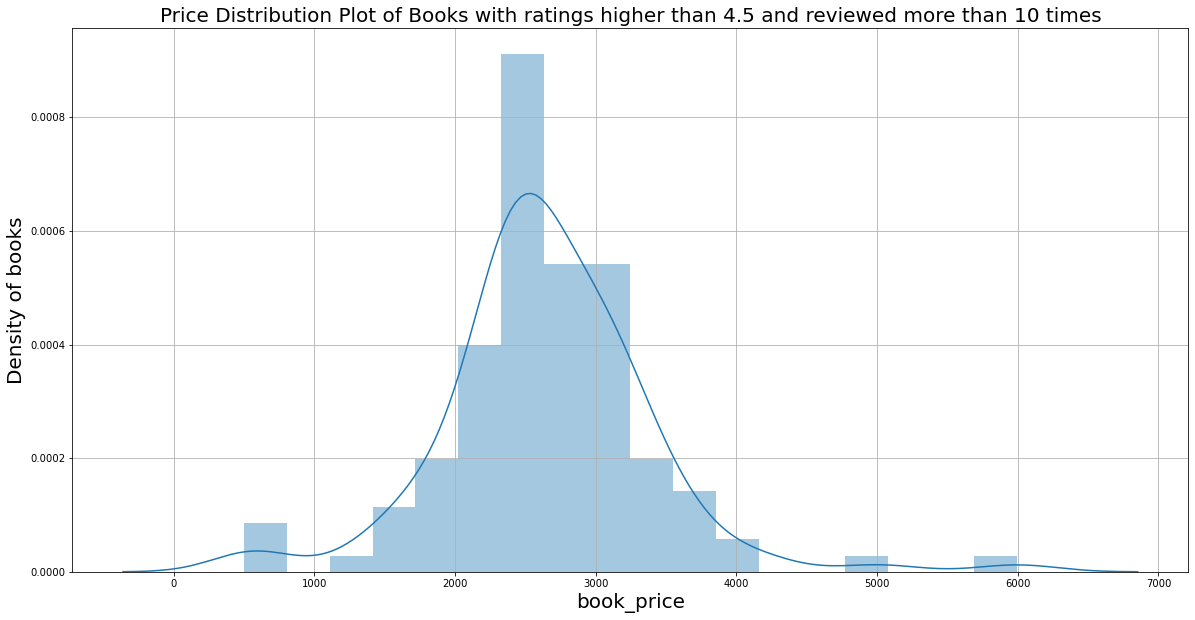

In [178]:
mpl.figure(figsize=(20, 10))
mpl.title("Price Distribution Plot of Books with ratings higher than 4.5 and reviewed more than 10 times", fontsize=20)
mpl.xlabel('Book Price', fontsize=20)
mpl.ylabel('Density of books', fontsize=20)
ax = sns.distplot(df_temp['book_price'])
mpl.grid()
mpl.show()

### The price distribution of books with ratings higher than 4.5 and reviews more than 10 shows a pretty much normal distribution of data (slightly skewed to the left though).
- It reflects that most of the books falling under this filter are priced between Rs. 2000-3000.
- Just a few books that are priced more than Rs. 3000 tend to perform well amongst the readers.

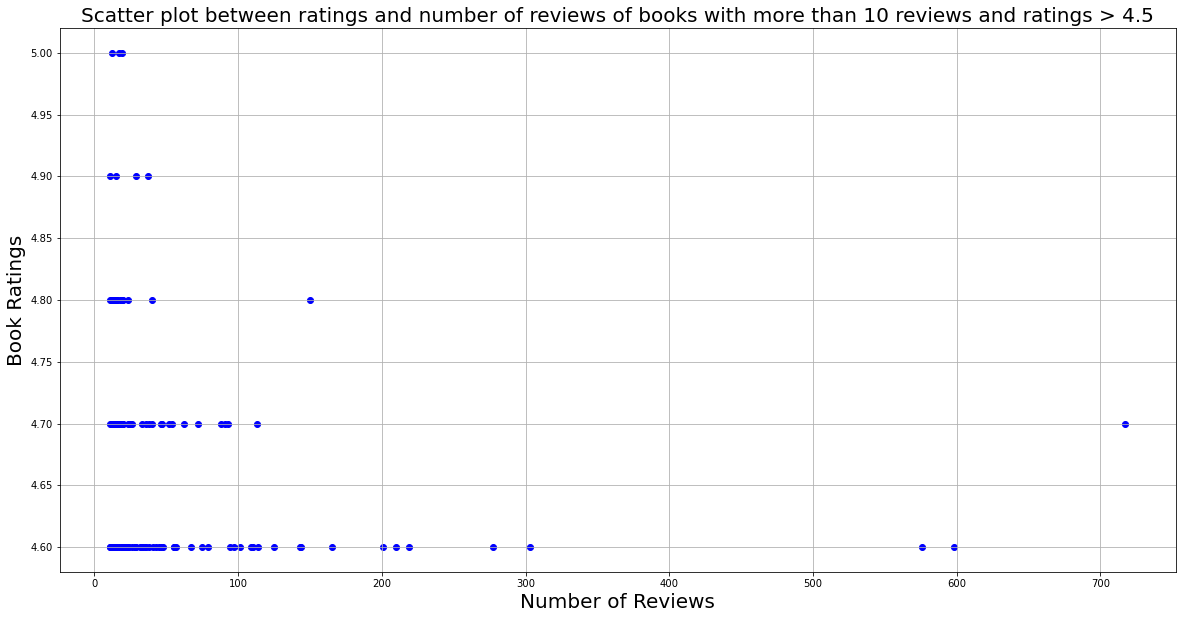

In [158]:
y_axis,x_axis = df_temp['book_ratings'], df_temp['book_number_of_reviews']

mpl.figure(figsize=(20, 10))
mpl.title("Scatter plot between ratings and number of reviews of books with more than 10 reviews and ratings > 4.5", fontsize=20)
mpl.ylabel('Book Ratings', fontsize=20)
mpl.xlabel('Number of Reviews', fontsize=20)
mpl.scatter(x_axis, y_axis, color='blue')
mpl.grid()
mpl.show()

##### This scatter plot between ratings and number of reviews of books with ratings > 4.5 and reviewed more than 10 times reflects that -
- Most of the books with ratings at 4.6 have been reviewed about 90-100 times.
- Books that have been reviewed more than 50 times tend to have a rating lesser than those that have been reviewed less than 50 times.

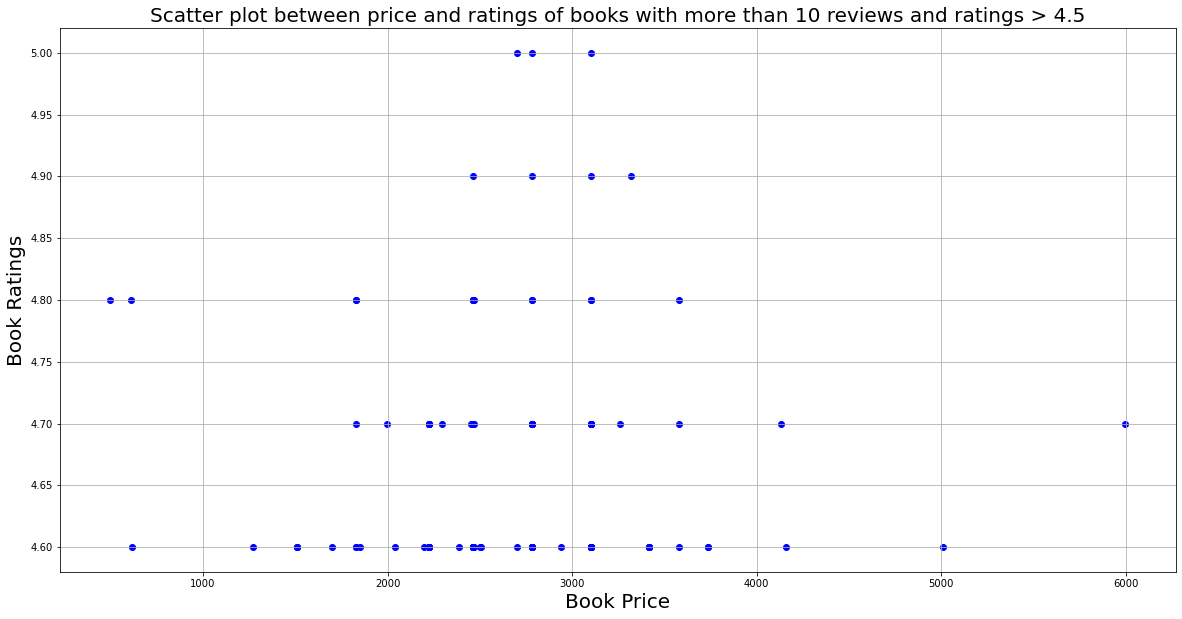

In [159]:
x_axis,y_axis = df_temp['book_price'], df_temp['book_ratings']

mpl.figure(figsize=(20, 10))
mpl.title("Scatter plot between price and ratings of books with more than 10 reviews and ratings > 4.5", fontsize=20)
mpl.xlabel('Book Price', fontsize=20)
mpl.ylabel('Book Ratings', fontsize=20)
mpl.scatter(x_axis, y_axis, color='blue')
mpl.grid()
mpl.show()

##### This scatter plot between price and ratings of books rated higher than 4.5 and reviewed more than 10 times shows that -
- The books priced between Rs. 2000-4000 have a rating significantly higher than the mean rating of the dataset(Mean : 4.125).
- It shows an almost normal distribution.

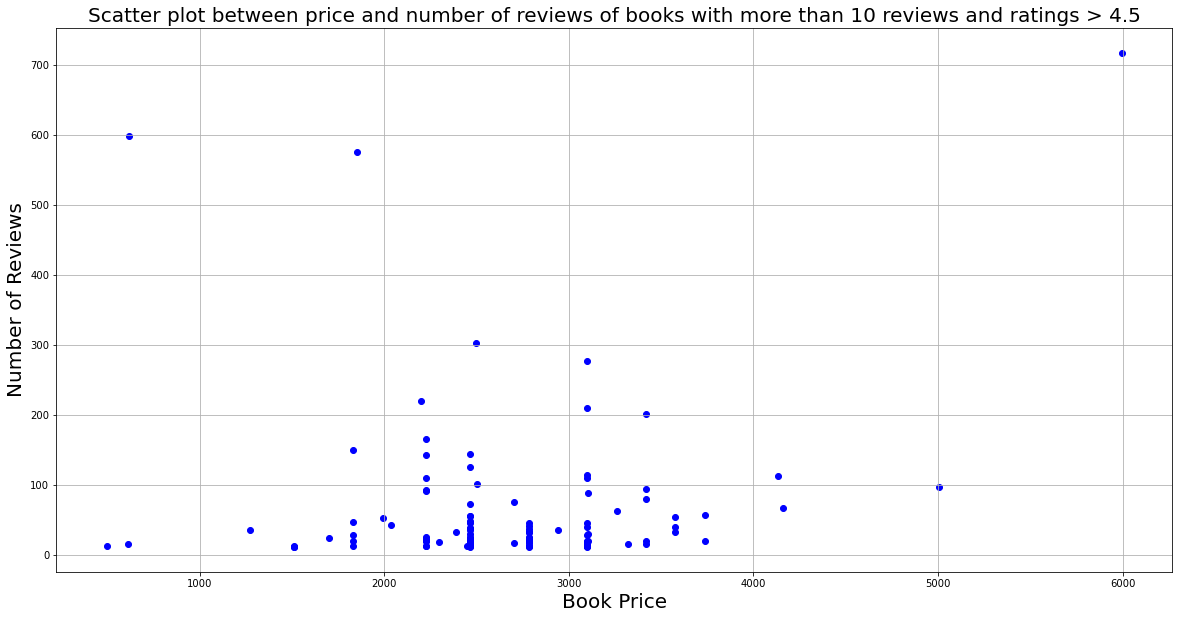

In [248]:
x_axis,y_axis = df_temp['book_price'], df_temp['book_number_of_reviews']

mpl.figure(figsize=(20, 10))
mpl.title("Scatter plot between price and number of reviews of books with more than 10 reviews and ratings > 4.5", fontsize=20)
mpl.xlabel('Book Price', fontsize=20)
mpl.ylabel('Number of Reviews', fontsize=20)
mpl.scatter(x_axis, y_axis, color='blue')
mpl.grid()
mpl.show()

- Books that are priced between Rs. 2000-4000 have been reviewed more compared to those priced outside of this price bracket.

In [251]:
a,b,c,d,e,f=0,0,0,0,0,0

for price in df_temp['book_price']:
    if price in range(1,1001):
        a+=1
    elif price in range(1001,2001):
        b+=1
    elif price in range(2001,3001):
        c+=1
    elif price in range(3001,4001):
        d+=1
    elif price in range(4001,5001):
        e+=1
    elif price in range(5001,6001):
        f+=1

count={'0-1000':a,
      '1001-2000':b,
      '2001-3000':c,
      '3001-4000':d,
      '4001-5000':e,
      '5001-6000':f}

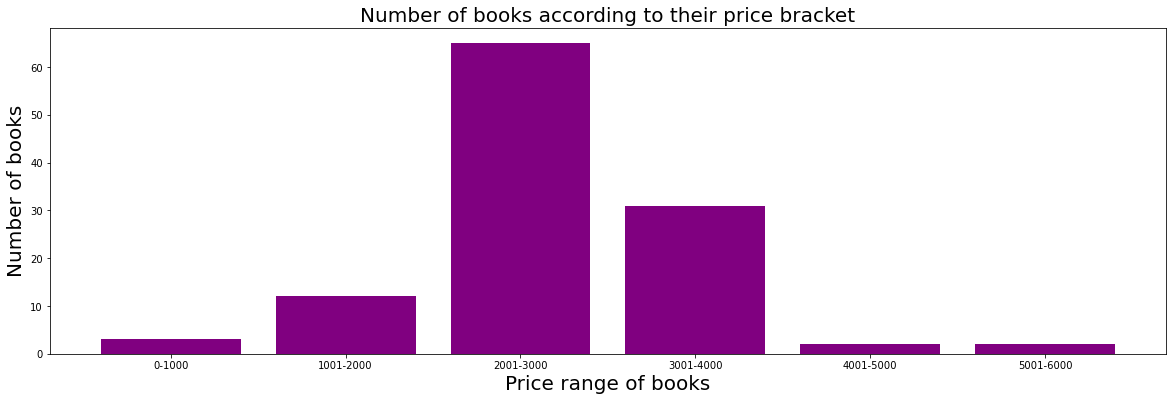

In [252]:
x_axis, y_axis=list(count.keys()), list(count.values())

mpl.figure(figsize=(20,6))
mpl.title('Number of books according to their price bracket', fontsize=20)
mpl.xlabel('Price range of books', fontsize=20)
mpl.ylabel('Number of books', fontsize=20)
mpl.bar(x_axis, y_axis, color='purple')
mpl.show()

- The bar plot above shows that majority of books that have ratings > 4.5 and have been reviewed more than 10 times have been priced in the range of Rs. 2000-4000

### Conclusions

#### About the entire dataset

- Most of the people prefer reading the books that are not too expensive.
- The books that are priced more than 5000 do not have many readers, thus not many reviews either.
- When a book has higher ratings, it is actually been reviewed by a significant number of people, and liked by them.
- The books with less reviews has less ratings, which reflects that people do not review a book when they don't like it.
- The ratings distribution is **skewed to the right**, which means most of the books have good ratings.
- The price distribution is **skewed to the left**, with most of the books priced between Rs, 1000-4000.
- Most books have been priced in the range of **Rs. 2000-3000.**

#### About books performing well (with ratings > 4.5 and reviewed more than 10 times)

- Mean Price - 2652.269565217391
- Median Price - 2466.0
- It reflects that most of the books falling under this filter are priced between **Rs. 2000-3000**.
- Books that have been **reviewed more than 50 times** tend to have a rating lesser than those that have been reviewed less than 50 times.
- Books priced between **Rs. 2000-4000** have been reviewed more, and have significantly higher ratings compared to the mean of entire dataset.
- Most books under this filter are priced between **Rs. 2000-3000.**